import libraries and set style for matplotlib

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)

print(plt.style.available)
#plt.style.use('default')
#plt.style.use('seaborn-darkgrid')
#plt.style.use("seaborn")
#plt.style.use("tableau-colorblind10")

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Read in data

In [156]:
df_all=pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\out_all.csv')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2138 non-null   int64  
 1   cat_name                2138 non-null   object 
 2   num_images              2138 non-null   int64  
 3   num_videos              2138 non-null   int64  
 4   age                     2138 non-null   object 
 5   breed                   2138 non-null   object 
 6   color                   1825 non-null   object 
 7   size                    2138 non-null   object 
 8   sex                     2138 non-null   object 
 9   characteristics         844 non-null    object 
 10  house_trained           2125 non-null   object 
 11  health                  2073 non-null   object 
 12  good_in_a_home_with     1337 non-null   object 
 13  adoption_fee            379 non-null    object 
 14  prefers_a_home_without  327 non-null    

In [3]:
df_all.head(2)

,Unnamed: 0,cat_name,num_images,num_videos,age,breed,color,size,sex,characteristics,house_trained,health,good_in_a_home_with,adoption_fee,prefers_a_home_without,coat_length,pet_story_num_words,rescue_group,data_set,num_cats
0,0,Ashe and Billie,6,0,Adult,Domestic Short Hair,NaN,Medium,Female,NaN,Yes,"Vaccinations up to date, spayed / neutered.",NaN,NaN,NaN,NaN,89.0,KittyKind,one_day,1
1,1,Billie and Ashe,6,0,Adult,Domestic Short Hair,NaN,Medium,Female,NaN,Yes,"Vaccinations up to date, spayed / neutered.",NaN,NaN,NaN,NaN,89.0,KittyKind,one_day,1


Create frequency distribution function

In [140]:
def proc_freq(df,variable_):  #Note variable_ must be given in quotes; example variable_: 'xyz'
    datax = df[variable_].value_counts().sort_index()
    
    datay = pd.DataFrame({
        variable_: datax.index,
        'Frequency': datax.values,
        'Percent': ((datax.values/datax.values.sum())*100).round(1),
        'Cumulative Frequency': datax.values.cumsum(),
        'Cumulative Percent': ((datax.values.cumsum()/datax.values.sum())*100).round(1)   })
    
    #datay.set_index(variable_)
    
    return(datay)

In [5]:
proc_freq(df_all,'data_set')

,data_set,Frequency,Percent,Cumulative Frequency,Cumulative Percent
0,fourteen_days,345,16.14,345,16.14
1,one_day,38,1.78,383,17.91
2,seven_days,204,9.54,587,27.46
3,spec_needs_other,14,0.65,601,28.11
4,thirty_day_spec_needs,104,4.86,705,32.97
5,thirty_days,1433,67.03,2138,100.00


In [143]:
def freq_crosstab(var1,var2):
    datab = pd.crosstab(var1, var2, margins=True, margins_name='Total')
    return(datab)



In [159]:
df_all['cat_id']=df_all['cat_name'] + ' ' + df_all['rescue_group']

df_all['thirty_days']=df_all['data_set'].apply(lambda x:  x in ['thirty_days'])

df_all['other_days'] =df_all['data_set'].apply(lambda x: x in ['one_day','seven_days','fourteen_days'])      

df_all['spec_needs'] = df_all['data_set'].apply(lambda x: x in ['spec_needs_other','thirty_day_spec_needs'])

#df_all['color'] = df_all['color'].astype(str)

# Tabby = [True if 'Tabby' in cat else False for cat in df_all['color']]
# print('length Tabby ',len(Tabby))
# df_all['Tabby'] = pd.Series(Tabby)


df_all['pet_story_num_words']  = df_all['pet_story_num_words'].fillna(0)

df_all['without_story'] = df_all['pet_story_num_words'] == 0

df_all['coat_length_miss'] = df_all['coat_length'].fillna('unknown')

df_all['color_miss'] = df_all['color'].fillna('unknown')


df_all['breed'] = df_all['breed'].fillna('unknown')

#create 'more_than_1_cat'
and1 = [True if 'and' in cat.split() else False for cat in df_all['cat_name']]
and2 = [True if '&' in cat.split() else False for cat in df_all['cat_name']]

mtn=(np.logical_or(and1,and2))
print('len more_than_1_cat ',len(mtn))

df_all['more_than_1_cat'] = pd.Series(mtn)



df_all['video']= df_all['num_videos'] > 0

df_all['num_pictures'] = df_all['num_images'].astype(str)

df_all['pictures'] = df_all['num_images'] > 0



breed_type=[]
for breed in df_all['breed']:
    if 'Domestic Short Hair' in breed:
        breed_type.append('DSH')
    elif 'Long Hair' in breed:   #Note 'Long Hair' must be identified before 'Mix','Tuxedo' 'Tortoiseshell' etc
        breed_type.append('DLH')
    elif 'Mix' in breed:
        breed_type.append('DSH')
    elif 'Tuxedo' in breed:
        breed_type.append('DSH')
    elif 'Tabby' in breed:
        breed_type.append('DSH')
    elif 'Calico' in breed:
        breed_type.append('DSH')
    elif 'Tortoiseshell' in breed:
        breed_type.append('DSH')
    elif 'Tiger' in breed:
         breed_type.append('DSH')
        
    else:
        breed_type.append('Other')

print('list length = ',len(breed_type))
        
df_all['breed_type'] = pd.Series(breed_type)

days_on_site = ['Thirty Days Plus' if v == True else 'Less Than Thirty Days' for v in df_all['thirty_days']]
print('days on site length',len(days_on_site)) #need variable in this form for graphs in analysis

df_all['Days_On_Site'] = pd.Series(days_on_site)

colors_keep=['Black & White / Tuxedo','Black', 'Tabby (Brown / Chocolate)', 'Gray & White', \
        'Tabby (Gray / Blue / Silver)', 'Orange & White', 'Gray / Blue / Silver', 'Calico', \
        'Tabby (Tiger Striped)', 'Tabby (Buff / Tan / Fawn)', 'White','Tortoiseshell', 'Orange / Red', \
        'Tabby (Orange / Red)'   ]

lst =[]    
for color_ in df_all['color']:
    if color_ in colors_keep:
        lst.append(color_)
    else:
        lst.append('Other')

#df_all['color_new'] = pd.Series(lst)
#print('len of lst ',len(lst))

df_all.shape



len more_than_1_cat  2138
list length =  2138
days on site length 2138


(2138, 33)

In [73]:
#df_all['color_miss'].value_counts(normalize=True)*100


write out data

In [160]:
df_all2 = df_all.loc[df_all['spec_needs']==False,:]
df_all2 = df_all2.drop(['spec_needs','breed','size','Unnamed: 0','house_trained','health','num_cats','other_days'], axis = 1)

df_all2.to_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\cleaned data\df_all.csv')

print('df_all2.shape = ',df_all2.shape)

# 'characteristics',
#df_all2.info()

df_all2.shape =  (2020, 25)


In [162]:
df_spec_needs = df_all.loc[df_all['spec_needs'],:]
df_spec_needs.to_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\cleaned data\df_spec_needs.csv')
df_spec_needs.head()

,Unnamed: 0,cat_name,num_images,num_videos,age,breed,color,size,sex,characteristics,...,spec_needs,without_story,coat_length_miss,color_miss,more_than_1_cat,video,num_pictures,pictures,breed_type,Days_On_Site
2020,0,Dougie,5,1,Senior,Domestic Short Hair,NaN,Medium,Female,NaN,...,True,False,unknown,unknown,False,True,5,True,DSH,Less Than Thirty Days
2021,1,Elias,6,1,Adult,Domestic Short Hair,NaN,Medium,Male,NaN,...,True,False,unknown,unknown,False,True,6,True,DSH,Less Than Thirty Days
2022,2,Beanie,5,0,Senior,Domestic Short Hair,Gray / Blue / Silver,Medium,Male,NaN,...,True,False,Short,Gray / Blue / Silver,False,False,5,True,DSH,Less Than Thirty Days
2023,3,Jalapeno - NYC,6,0,Young,Domestic Short Hair,Black,Medium,Female,FIV positive,...,True,False,unknown,Black,False,False,6,True,DSH,Less Than Thirty Days
2024,4,Bambi - NYC,6,0,Adult,Domestic Short Hair,Black,Medium,Female,FIV positive,...,True,False,unknown,Black,False,False,6,True,DSH,Less Than Thirty Days


Determine number of duplicates by rescue group

In Pandas:

The values property is used to get a Numpy representation of the DataFrame. Only the values in the DataFrame will be returned, the axes labels will be removed. The values of the DataFrame. A DataFrame where all columns are the same type (e.g., int64) results in an array of the same type.

In [110]:
# for x in df_all2.groupby(['cat_id']):
#     print(x)
    

In [87]:

mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
#Once it's aggregated it becomes a one column DataFrame -  cat_id is index and cat_name is a boolean

print('type: mask  ',type(mask))
print('shape: mask  ',mask.shape)
#print(mask)
print(' ')

#this get's the values of the index which is cat_id and creates an index object which is essentially a list of the cat_id's
#Without the .index it just creates a DataFrame
list_mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[mask.values,:].index
print('type list_mask:  ',type(list_mask))
print('list_mask:  ')
print(list_mask)
print(' ')

#final_mask is a boolean Series with the same index as df_all2
final_mask = df_all2['cat_id'].isin(list_mask) 
print('type: final_mask  ',type(final_mask))
print('final_mask.shape:  ',final_mask.shape) 
print('final_mask:  ')
print(final_mask)


#the df created  below is the rescue group followed by however many duplicates #It is a dataframe
df_all2.loc[final_mask,['cat_id','rescue_group','thirty_days']].groupby(['thirty_days','rescue_group']).count()

type: mask   <class 'pandas.core.frame.DataFrame'>
shape: mask   (1780, 1)
 
type list_mask:   <class 'pandas.core.indexes.base.Index'>
list_mask:  
Index(['Mash & Fries - Bonded Brothers AdvoCat Rescue',
       'Miss Misstoffelees AdvoCat Rescue',
       'Fries & Mash - Bonded Brothers AdvoCat Rescue',
       'The Jimmy AdvoCat Rescue',
       'Hermione - Hogwarts Kittens AdvoCat Rescue',
       'Harry - Hogwarts Kittens AdvoCat Rescue',
       'Ron - Hogwarts Kittens AdvoCat Rescue',
       'Favorite Babies-Wonton, Lichee, Sprout & Dumpling Brooklyn Animal Action',
       'Bacall All About Cats Rescue, Inc', 'Leo Bergen County Animal Shelter',
       ...
       'Basil and Sage: Spice Kittens! Brooklyn Animal Action',
       'Picasso Petunia Liberty Humane Society', 'Tracy Infinite Hope',
       'Lulu Eccentric Kittens', 'Lah Lah Ready For Rescue',
       'Dusty and Oliver Waggytail Rescue',
       'Abandoned Cats Coming In Friends of the Clifton Animal Shelter',
       'Mickey Ready 

cat_id
thirty_days rescue_group                                         
False       A Purrfect World                                    2
            Adopt-A-Buddy                                       2
            AdvoCat Rescue                                     48
            All About Cats Rescue, Inc                         23
            Alleykattz Rescue                                   4
            Animal Adoption Veterinary Center                   4
            Animal Life Savers Inc.                            20
            Animal Lighthouse Rescue                            2
            Animals Are Forever, Inc                            2
            Anjellicle Cats Rescue                              2
            Bergen County Animal Shelter                        3
            Best Friend Dog and Animal Adoption, Inc.           2
            Bronx Tails Cat Rescue                              6
            Brooklyn Adoptables                                 8
            Brooklyn Animal Action                             27
            Brooklyn Bridge Animal Welfare Coalition            8
            CLAWS                                               6
            Caring About The Strays (C.A.T.S.) Inc.             2
            Cat Assistance Inc.                                 2
            Cat Castle NYC                                      4
            City Critters Inc.                                  4
            East Coast Maine Coon Rescue                        4
            Eastchester Bay Stray Cat Project                   2
            Eccentric Kittens                                  16
            Edison Municipal Animal Shelter                    10
            For Blake's Sake Rescue, Inc.                       8
            Frankie's Fund for Feline Care and Rescue           2
            Friends of Linden Animal Shelter, Inc.             20
            Friends of the Clifton Animal Shelter               6
            Good World Animal Rescue and Protection,…           2
            Happy Friends Rescue                                2
            Happy Homes Animal Rescue                           8
            Hudson County Animal League (HCAL)                  2
            Humane Society of Westchester at New Rochelle       7
            Humane Urban Group                                  4
            Infinite Hope                                      10
            Jersey Tails                                        2
            JerseyCats                                          2
            Kat Connection                                      8
            KittyKaretakers of Queens                           2
            KittyKind                                           2
            Lend-a-Paw Inc.                                     4
            Liberty Humane Society                             16
            Meows Kitty Cat Rescue Inc.                        14
            Miss Pats Cats                                      2
            PAWS - Montclair                                    2
            Pequannock Animal Shelter                           2
            Pets4Luv Foundation                                 2
            Posh Pets Rescue                                    2
            Ready For Rescue                                    4
            Rescue Haven Foundation                             2
            S.A.R.A. Inc.                                       8
            Saving Cats & Kittens of Brooklyn                   2
            Sunset Park Cats                                    4
            The Lucky Cat Rescue                                3
            Union City Animal Trust                             3
            Union City Feral Cat Committee                     12
            Waggytail Rescue                                    2
            West Orange TNVR                                    2
            Whiskers-aGoGo Inc   

'     '

Calculate percent of rescue groups with duplicate listings

In [79]:
#CALCULATING PERCENT OF RESCUE GROUPS THAT RELIST CATS

all_rescue_groups = df_all2['rescue_group'].unique()
num_rescue_groups = len(all_rescue_groups)
print(len(all_rescue_groups))
print(type(all_rescue_groups))


num_rescues_w_dupes = len(df_all2.loc[final_mask,['cat_id','rescue_group','thirty_days']].groupby(['thirty_days','rescue_group']))
print('num_rescues_w_dupes ',num_rescues_w_dupes)
print('type num_rescues_w_dupes  ',type(num_rescues_w_dupes))

print(type(num_rescues_w_dupes))

print(type(df_all2.loc[final_mask,['cat_id','rescue_group','thirty_days']].groupby(['thirty_days','rescue_group'])))
percent_relist = num_rescues_w_dupes/num_rescue_groups
print('percent_relist = ',percent_relist)

 

177
<class 'numpy.ndarray'>
num_rescues_w_dupes  70
type num_rescues_w_dupes   <class 'int'>
70
<class 'int'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
percent_relist =  0.3954802259887006


Trying to determine:  What percentage of unique ids are duplicates? 

In [106]:
# mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
# list_mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[mask.values,:].index
# final_mask = df_all2['cat_id'].isin(list_mask)

list_cat_ids_with_dupes = df_all2.loc[final_mask ,'cat_id'].unique()
print('len((list_cat_ids_with_dupes))  ',len((list_cat_ids_with_dupes)))
print(' ')


list_all_cat_ids = df_all2.loc[:,'cat_id'].unique()

#What percentage of unique ids are duplicates
pct_of_totalcats=len((list_cat_ids_with_dupes))/len(list_all_cat_ids)
print('pct_of_totalcats  ',pct_of_totalcats)

# print ('len(final_mask)  ',len(final_mask))
# df_all2['final_mask'] = final_mask

len((list_cat_ids_with_dupes))   189
 
pct_of_totalcats   0.10617977528089888


In [129]:
# mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
# list_mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[mask.values,:].index
# final_mask = df_all2['cat_id'].isin(list_mask)
#df_all['Days_On_Site']
df_all2['is_dupe'] = df_all2['cat_id'].isin(list_cat_ids_with_dupes)

group_not30 = df_all2.groupby(['thirty_days','is_dupe']).agg({'cat_id':'nunique'})

group_thirty = df_all2.groupby(['thirty_days']).count()['cat_name']

print(type())
print('group_not30  ')
print(group_not30)
print(' ')

print('type(group_thirty)  ',type(group_thirty))
print('group_thirty  ')
print(group_thirty)

group_not30  
                     cat_id
thirty_days is_dupe        
False       False       170
            True        185
True        False      1421
            True          8
 
type(group_thirty)   <class 'pandas.core.series.Series'>
group_thirty  
thirty_days
False     587
True     1433
Name: cat_name, dtype: int64


In [141]:
df_cat_id_dupe_freq = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).reset_index()
df_cat_id_dupe_freq = df_cat_id_dupe_freq.loc[df_cat_id_dupe_freq['cat_name'] > 1,:]

proc_freq(df_cat_id_dupe_freq,'cat_name')

,cat_name,Frequency,Percent,Cumulative Frequency,Cumulative Percent
0,2,165,87.3,165,87.3
1,3,17,9.0,182,96.3
2,6,4,2.1,186,98.4
3,8,3,1.6,189,100.0


<Figure size 1080x576 with 0 Axes>

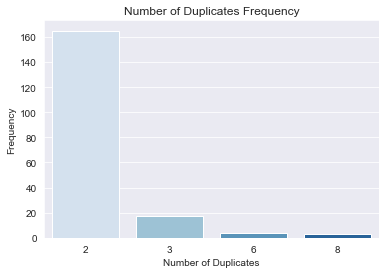

<Figure size 1080x576 with 0 Axes>

In [139]:
sns.set_style('darkgrid')
#color_order=['Kitten','Young','Adult','Senior']
#order=color_order,
 
chart = sns.countplot(x='cat_name', data = df_cat_id_dupe_freq, palette='Blues')

chart.set(xlabel="Number of Duplicates", ylabel = "Frequency")

chart.set(title='Number of Duplicates Frequency')

plt.figure(figsize = (15,8))

#plt.savefig('num_cats_by_age.png', dpi=300)


In [ ]:
df_all2.groupby(['rescue_group']).count()[['cat_id']].sort_values(by=['cat_id'],ascending=False) 

In [ ]:
df_all2.loc[df_all2['age']== 'Adult'].groupby(['rescue_group']).unique()[['cat_id']].sort_values(by=['cat_id'],ascending=False) 

In [ ]:
df_all['spec_needs'] 

good_in_a_home_with     1337 non-null 

Top 10 Rescue groups in terms of number of adult cats

Top 10 Rescue groups in terms of number of senior cats

Top 10 Rescue groups in terms of number of special needs cats

are duplicate records the same in every way except for days on site
are duplicate records the same in every way except for a specific field
 

dupes across all three

count distinct

num cats age cross tab

num cats color cross tab
 
box plot num words not miss

% no dupe       
drop_duplicates()
duplicated() can make a mask and select a subset of columns to see if there are duplicates and count the number of trues

In [153]:
#pd.merge(df3, df4, how='outer', on ='col2')

(pd.merge[df_all2.loc[df_all2['data_set']=='seven_days',:],df_all2.loc[df_all2['data_set']=='thirty_days',:], how ='outer',on ='cat_id'])
        

SyntaxError: invalid syntax (<ipython-input-153-10f7a78b39f2>, line 3)

In [154]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2138 non-null   int64  
 1   cat_name                2138 non-null   object 
 2   num_images              2138 non-null   int64  
 3   num_videos              2138 non-null   int64  
 4   age                     2138 non-null   object 
 5   breed                   2138 non-null   object 
 6   color                   1825 non-null   object 
 7   size                    2138 non-null   object 
 8   sex                     2138 non-null   object 
 9   characteristics         844 non-null    object 
 10  house_trained           2125 non-null   object 
 11  health                  2073 non-null   object 
 12  good_in_a_home_with     1337 non-null   object 
 13  adoption_fee            379 non-null    object 
 14  prefers_a_home_without  327 non-null    

In [147]:
#print(proc_freq(df_all2,'more_than_1_cat'))
freq_crosstab(df_all2['more_than_1_cat'],df_all2['age'])
proc_freq(df_all2,'data_set')

,data_set,Frequency,Percent,Cumulative Frequency,Cumulative Percent
0,fourteen_days,345,17.1,345,17.1
1,one_day,38,1.9,383,19.0
2,seven_days,204,10.1,587,29.1
3,thirty_days,1433,70.9,2020,100.0




determining if it is worth is to break things out further by age and it's not

In [88]:
# mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
# list_mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[mask.values,:].index
# final_mask = df_all2['cat_id'].isin(list_mask)

dupes_by_days_age = df_all2.loc[final_mask,['cat_id','Days_On_Site','age']].groupby(['Days_On_Site','age']).count().reset_index()
dupes_by_days_age

print(' ')
#type(dupes_by_age)
print(dupes_by_days_age)

 
            Days_On_Site     age  cat_id
0  Less Than Thirty Days   Adult      62
1  Less Than Thirty Days  Kitten     272
2  Less Than Thirty Days  Senior      18
3  Less Than Thirty Days   Young      65
4       Thirty Days Plus   Adult       8
5       Thirty Days Plus  Kitten       2
6       Thirty Days Plus   Young       2


<Figure size 1080x576 with 0 Axes>

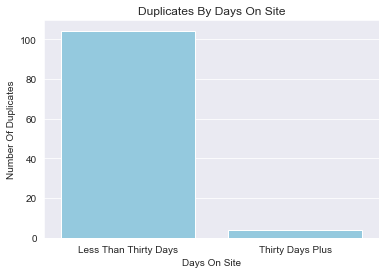

<Figure size 1080x576 with 0 Axes>

In [108]:
sns.set_style('darkgrid')
color_order=['Less Than Thirty Days','Thirty Days Plus']
 
chart = sns.barplot(x='Days_On_Site', y='cat_id', data = dupes_by_days_age, ci=False, order=color_order, color='skyblue')

chart.set(xlabel="Days On Site", ylabel = "Number Of Duplicates")

chart.set(title='Duplicates By Age for Cats Less Than Thirty')
chart.set_title('Duplicates By Days On Site')
plt.figure(figsize = (15,8))

In [109]:
# mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False) > 1
# list_mask = df_all2.groupby(['cat_id']).count()[['cat_name']].sort_values(by=['cat_name'],ascending=False).loc[mask.values,:].index
# final_mask = df_all2['cat_id'].isin(list_mask)

dupes_by_age = df_all2.loc[(final_mask ),['cat_id','age']].groupby(['age']).count().reset_index()
dupes_by_age

,age,cat_id
0,Adult,70
1,Kitten,274
2,Senior,18
3,Young,67


How do I determine if other fields are different for cats that have duplicates (other than days on site)?

<Figure size 1080x576 with 0 Axes>

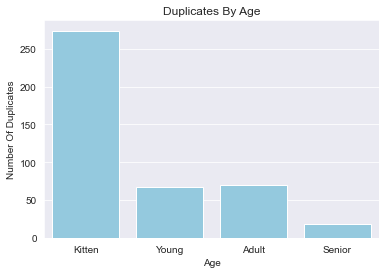

<Figure size 1080x576 with 0 Axes>

In [90]:
sns.set_style('darkgrid')
color_order=['Kitten','Young','Adult','Senior']
 
chart = sns.barplot(x='age', y='cat_id', data = dupes_by_age, ci=False, order=color_order, color='skyblue')

chart.set(xlabel="Age", ylabel = "Number Of Duplicates")

chart.set(title='Duplicates By Age for Cats Less Than Thirty')
chart.set_title('Duplicates By Age')
plt.figure(figsize = (15,8))

eyeballing rescue groups with duplicates

In [91]:

#df_all2.loc[df_all2['rescue_group']=='AdvoCat Rescue',['cat_name','data_set','age']]


In [92]:
#df_all2.loc[df_all2['rescue_group']=='Miss Pats Cats',['cat_name','data_set','age']].sort_values(by=['cat_name'])

In [93]:
#df_all2.loc[df_all2['rescue_group']=='Animal Life Savers Inc.',['cat_name','data_set','age']]
#df_all2.loc[df_all2['rescue_group']=='A Pathway to Hope',['cat_name','data_set','age']]



Alternate method of calculation for more_than_1_cat variable

In [19]:
Alternate method of calculation for more_than_1_cat variable
m_than_one = df_all.loc[df_all['cat_name'].str.contains('&| and ',case=False)]
m_than_one
df_all['more_than_1_cat'] = df_all['cat_name'].apply(lambda x:  x in m_than_one['cat_name'].to_list())
df_all['more_than_1_cat'].value_counts()



False    1921
True      217
Name: more_than_1_cat, dtype: int64

Create two separate DataFrames one for thirty days and one for less than thirty days. 

Create two subset DataFrames  to compare kittens only

In [95]:
df_thirty = df_all.loc[df_all.thirty_days,:]
df_thirty['days_on_site'] = 'Thirty Days Plus'

df_other_days = df_all.loc[df_all.other_days,:]
df_other_days['days_on_site'] = 'Less Than Thirty Days'

df_thirty_k = df_thirty.loc[df_thirty['age']=='Kitten',:]
df_other_days_k = df_other_days.loc[df_other_days['age']=='Kitten',:]

df_other_days['days_on_site'].value_counts()

combined_df = pd.concat([df_other_days,df_thirty], axis = 0, sort=False)

combined_df_k = combined_df.loc[combined_df['age']=='Kitten',:]

combined_df['days_on_site'].value_counts()

<ipython-input-95-46c2b61a3dfb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thirty['days_on_site'] = 'Thirty Days Plus'
<ipython-input-95-46c2b61a3dfb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other_days['days_on_site'] = 'Less Than Thirty Days'


Thirty Days Plus         1433
Less Than Thirty Days     587
Name: days_on_site, dtype: int64

In [ ]:
def func_freq(lst):
    for el in lst:
        print('Thirty Days Plus')
        print(proc_freq(df_thirty,el))
        print()
        print('Less Than Thirty Days')
        print(proc_freq(df_other_days,el))
        print('_'*75)

In [ ]:
cols=['age','sex','Tabby','without_story','coat_length_miss','coat_length', 'more_than_1_cat','breed_type','video', \
      'pictures','num_pictures']
func_freq(cols)

In [ ]:
def func_freq_k(lst):
    for el in lst:
        print('Thirty Days Plus Kittens')
        print(proc_freq(df_thirty_k,el))
        print()        print('Less Than Thirty Days Kittens')
        print(proc_freq(df_other_days_k,el))
        print('_'*75)

In [ ]:
cols=['age','sex','Tabby','without_story','coat_length_miss','coat_length', 'more_than_1_cat','breed_type','video', \
      'pictures','num_pictures']
func_freq_k(cols)

In [ ]:
print('df_other_days')
print(df_other_days.describe())
print('#'*20)
print('df_thirty')
print(df_thirty.describe())

In [ ]:
print('df_other_days median ',df_other_days['pet_story_num_words'].median())
print('df_other_days mean ',df_other_days['pet_story_num_words'].mean())
print(' ')
print('df_thirty median ',df_thirty['pet_story_num_words'].median())
print('df_thirty mean ',df_thirty['pet_story_num_words'].mean())


In [ ]:
df = combined_df.loc[:,['days_on_site','pet_story_num_words']]
data_wide = df.pivot(columns='days_on_site',
                     values='pet_story_num_words')
data_wide.head()

# calling density() to make
# multiple density plot 
data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("Pet Story Number of Words")
data_wide

In [ ]:
#num_images

plt.style.use("tableau-colorblind10")

data1 = df_other_days['num_images']
data2 = df_thirty['num_images']

data = list([data1, data2])

# Figure size
plt.figure(figsize=(10,5))

fig, ax = plt.subplots()

# build a box plot
ax.boxplot(data)



# title and axis labels
ax.set_title('Number of Cat Pictures')
ax.set_xlabel('')
ax.set_ylabel('Pictures')
xticklabels=['Less Than Thirty Days', 'Thirty Days Plus']
ax.set_xticklabels(xticklabels)

plt.show()



In [ ]:
print('df_other_days median ',df_other_days['num_images'].median())
print('df_other_days mean ',df_other_days['num_images'].mean())
print(' ')
print('df_thirty median ',df_thirty['num_images'].median())
print('df_thirty mean ',df_thirty['num_images'].mean())


In [ ]:
df = combined_df.loc[:,['days_on_site','num_images']]
data_wide = df.pivot(columns='days_on_site',
                     values='num_images')
data_wide.head()

# calling density() to make
# multiple density plot 
data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("Number of Pictures")

In [ ]:
g = sns.FacetGrid(penguins,col='island') #you can also use row
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y= 'bill_length_mm')
g.set_axis_labels('Culment Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template= '{col_name} Island');

In [ ]:
print('30 days plus')
print(df_thirty['sex'].value_counts(normalize=True))
print('#'*50)
print('Other days')
print('_'*50)
print(df_other_days['sex'].value_counts(normalize=True)) 

In [ ]:
#plt.style.use('darkgrid')
#set_style('darkgrid[')]
plt.style.use("tableau-colorblind10")

In [ ]:
# Numbers of pairs of bars 
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
Other_days = df_other_days['sex'].value_counts(normalize=True)*100
# Specify the values of orange bars (height)
Thirty_days = df_thirty['sex'].value_counts(normalize=True)*100

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, Other_days , width )
plt.bar(ind + width, Thirty_days, width)

plt.xlabel('Gender')
plt.ylabel('Percentage Of Cats')
plt.title('Gender Comparison')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Less Than Thirty Days','Thirty Days Plus'))

# Finding the best position for legends and putting it
plt.legend(loc=2)
plt.show()


In [ ]:
Other_days.

In [ ]:
Thirty_days

In [ ]:
df_thirty['breed_type'].value_counts(normalize=True)

In [ ]:
df_other_days['breed_type'].value_counts(normalize=True)

In [ ]:
group_30=df_thirty.groupby(['breed_type','age']).agg(['count'])['cat_name']
group_30.loc['DLH',:]

In [ ]:
dfb = df_thirty.groupby(['breed_type']).agg(['count'])['cat_name']
dfb.loc['DLH',:]

In [ ]:
group_30.loc['DLH',:]/dfb.loc['DLH',:]

In [ ]:
group_30b = df_thirty.groupby(['breed_type','age'])
group_30.agg(['sum'])['num_cats']

In [ ]:
df_thirty['age'].value_counts(normalize=True)

In [ ]:
df_other_days['age'].value_counts(normalize=True)

In [ ]:
df_other_days['age'].value_counts()

In [ ]:
#df_all.groupby('data_set')['age'].value_counts(normalize=True).plot.bar()

In [ ]:
#df_thirty['breed'].value_counts(normalize=True)


In [ ]:
df_thirty['color'].value_counts(normalize=True)

In [ ]:
df_other_days = df_all.loc[df_all.other_days,:]
df_other_days.head(2)
df_other_days['age'].value_counts(normalize=True)

In [ ]:
N=4

Thirty_Days_Plus = df_thirty['age'].value_counts(normalize=True)
Other_Days = df_other_days['age'].value_counts(normalize=True)

width=0.35
ind = np.arange(N) 


In [ ]:
N = 4

# Data on X-axis

# Specify the values of blue bars (height)
Other_Days = df_other_days['age'].value_counts(normalize=True)*100
# Specify the values of orange bars (height)
Thirty_Days_Plus = df_thirty['age'].value_counts(normalize=True)*100

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, Other_Days , width, label='Less Than Thirty Days')
plt.bar(ind + width, Thirty_Days_Plus, width, label='Thirty Days Plus')

plt.xlabel('Age')
plt.ylabel('Percentage Of Cats')
plt.title('Age Comparison')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Kitten', 'Young', 'Adult', 'Senior'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [ ]:
df_other_days['color'].value_counts(normalize=True)

In [ ]:
rescue_groups_other = list(df_other_days['rescue_group'].unique())
#type(df_other_days['rescue_group'].unique())
df_other_rescue = pd.DataFrame({'rescue_group':rescue_groups_other})
df_other_rescue

In [ ]:
df_all.groupby(['rescue_group'])['unique_cat_id'].nunique()

In [ ]:
df_days = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\out_days_petfinder_combined.csv')

df_days.head(2) 

In [ ]:

df_spec_needs = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\out_spec_needs_combined.csv')
df_spec_needs.head(2)

In [ ]:
df_spec_needs = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\out_spec_needs_combined.csv')